In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

import pickle

In [2]:
df = pd.read_csv('../data/raw_recording_1.csv')
df

,x_pos,y_pos,channel_1,channel_2,channel_3,channel_4
0,2272.0,659.0,319,19,0,83
1,2268.0,661.0,22,32,0,83
2,2265.0,664.0,22,31,12,83
3,2265.0,664.0,22,31,16,111
4,2265.0,664.0,21,31,16,111
...,...,...,...,...,...,...
122532,1577.0,1148.0,13,28,6,351
122533,1577.0,1148.0,13,28,6,351
122534,1581.0,1148.0,13,28,6,351
122535,1581.0,1148.0,13,28,6,350


In [3]:
# df.drop(columns=['time', 'start', 'end'], inplace=True)

In [4]:
for i in range(10000,10500):

    df[f'channel_1_{i}'] = df['channel_1'].shift(i)
    df[f'channel_2_{i}'] = df['channel_2'].shift(i)
    df[f'channel_3_{i}'] = df['channel_3'].shift(i)
    df[f'channel_4_{i}'] = df['channel_4'].shift(i)

In [5]:
df['x_diff'] = df['x_pos'].diff()
df['y_diff'] = df['y_pos'].diff()

In [6]:
df.dropna(inplace=True)

In [7]:
X = df.drop(columns=['x_pos', 'y_pos', 'x_diff', 'y_diff'])
y = list(df['x_diff'])

W = X
z = list(df['y_diff'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)
W_train, W_test, z_train, z_test = train_test_split(W, z, shuffle = False)

In [9]:
lr_x = DecisionTreeRegressor(max_depth=50)
lr_x.fit(X_train, y_train)

lr_y = DecisionTreeRegressor(max_depth=50)
lr_y.fit(W_train, z_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=50,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [10]:
lr_x.score(X_train, y_train), lr_x.score(X_test, y_test)

(0.9956499916675465, -1.9827793231664756)

In [11]:
lr_y.score(W_train, z_train), lr_y.score(W_test, z_test)

(0.9927989543655756, -1.6157710029325512)

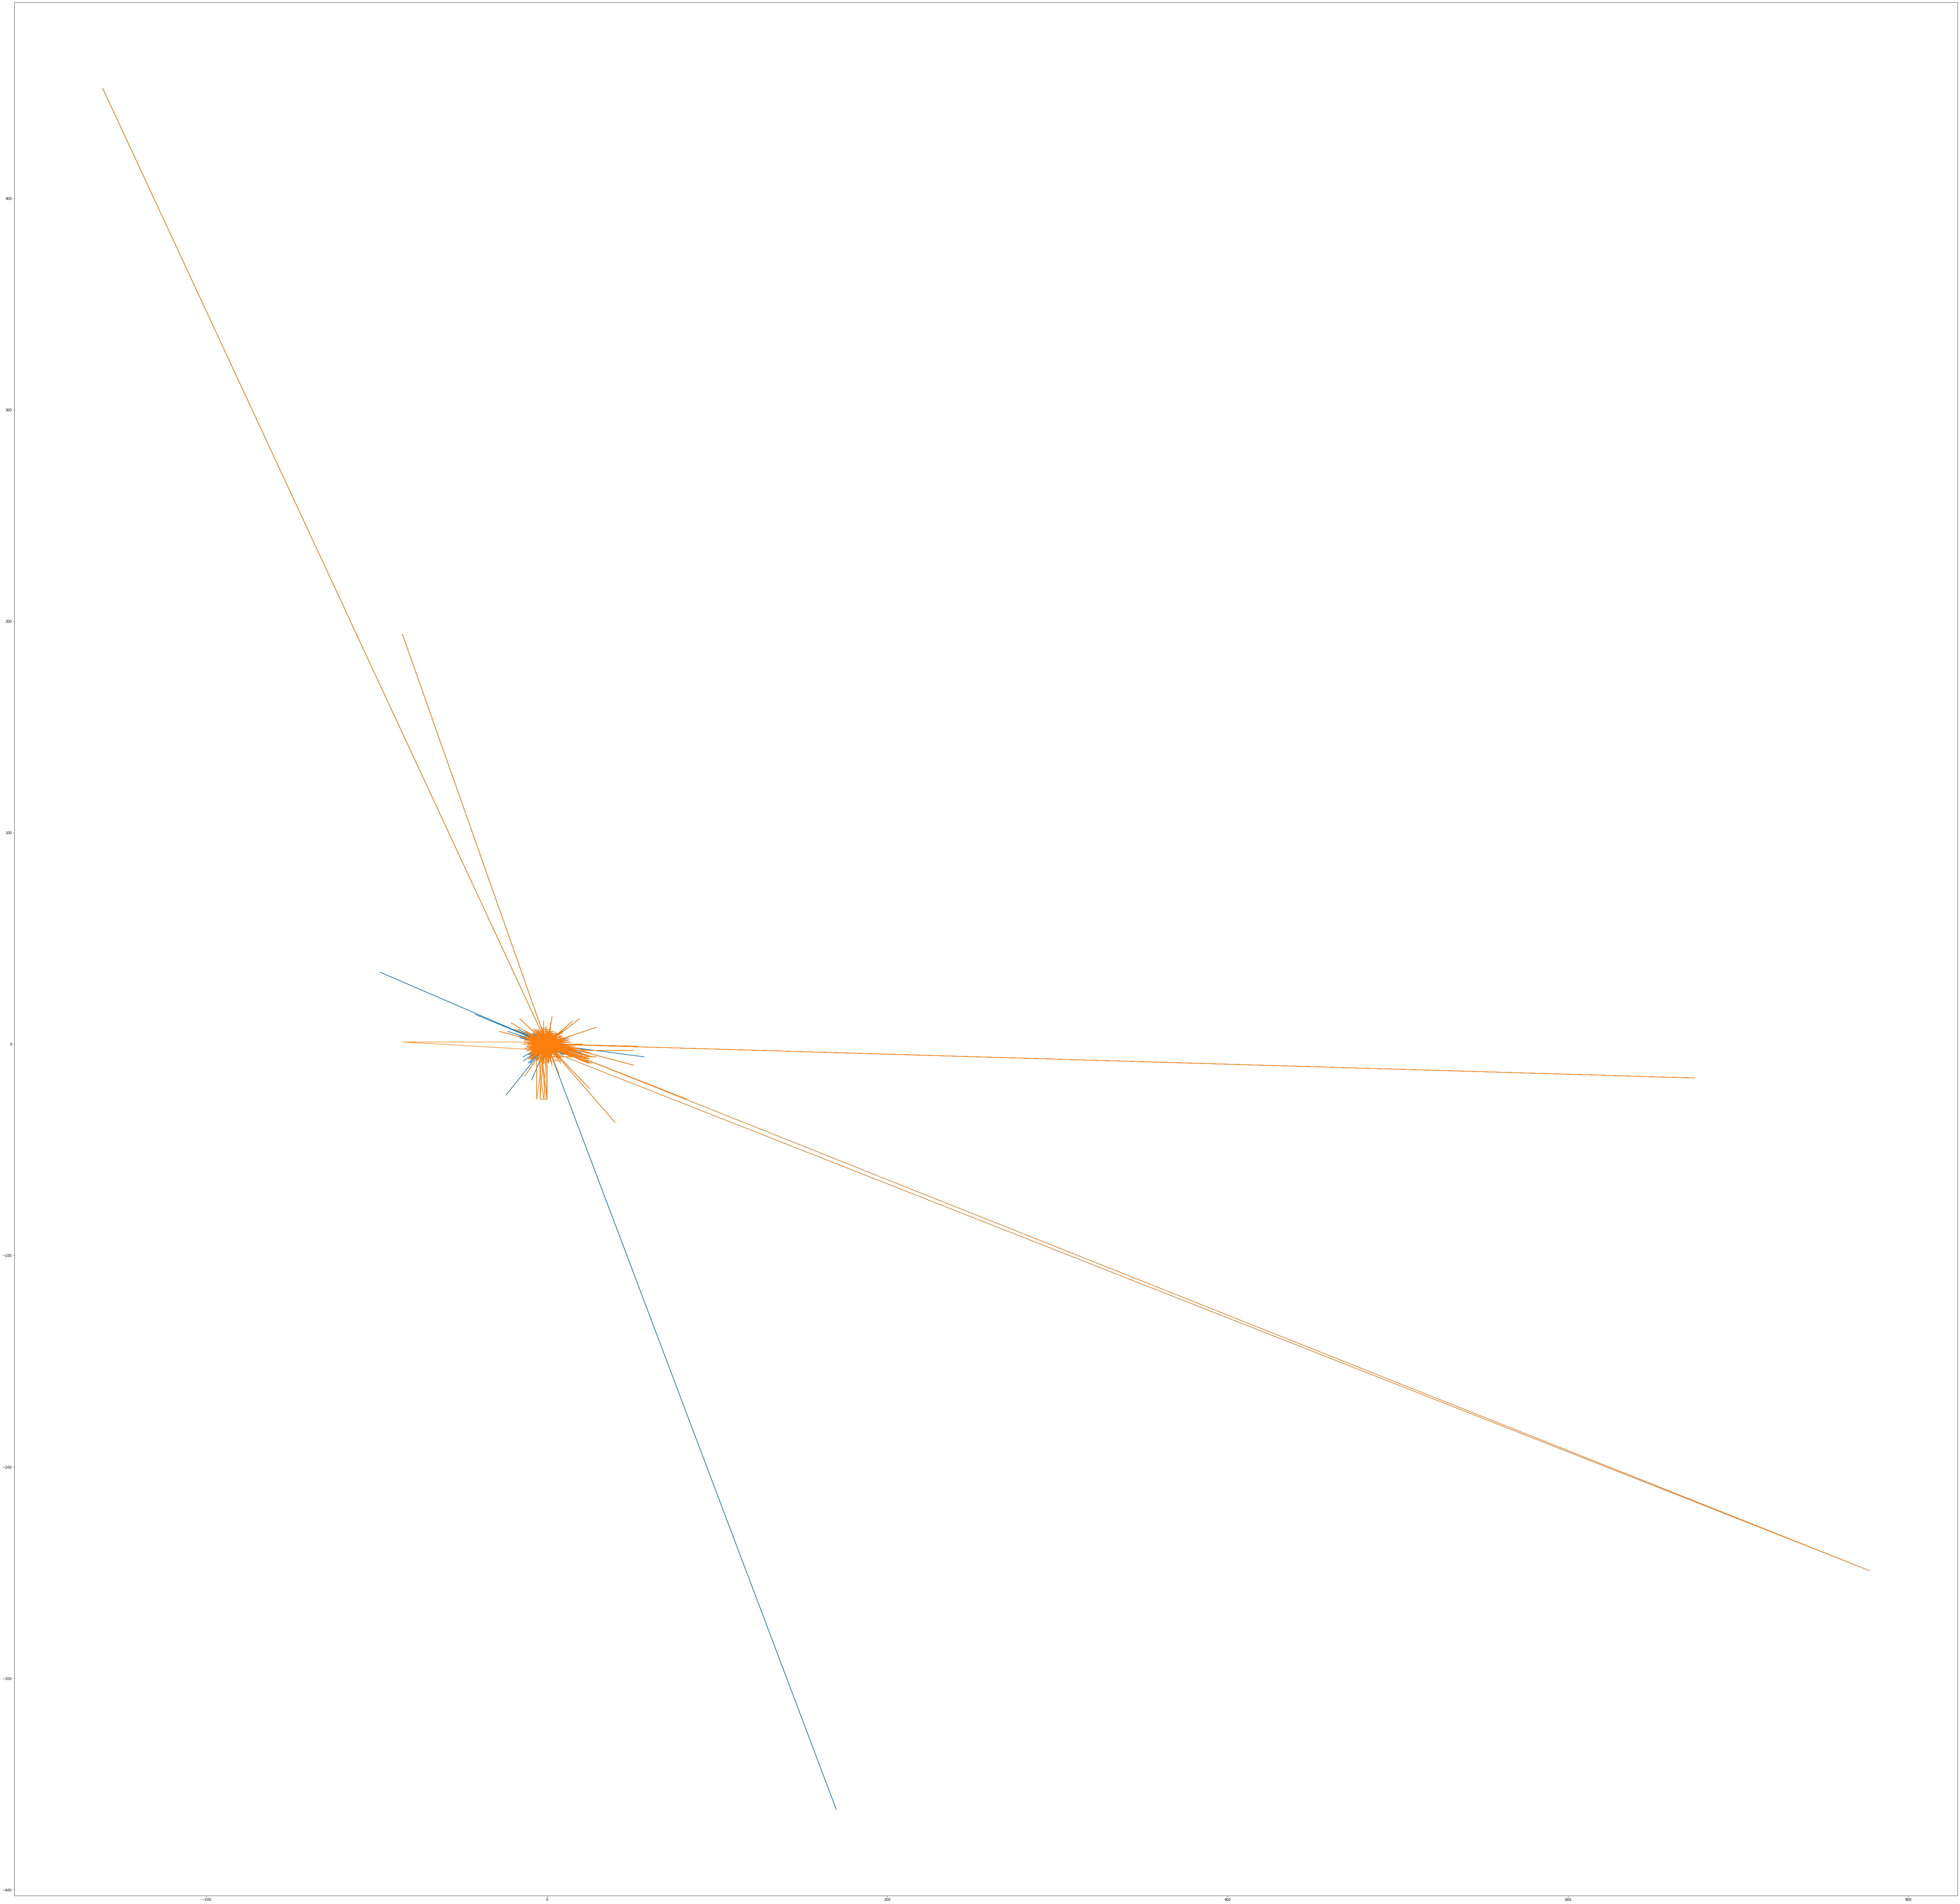

In [12]:
plt.figure(figsize=(100,100))
plt.plot(y, z);
plt.plot(lr_x.predict(X), lr_y.predict(W));


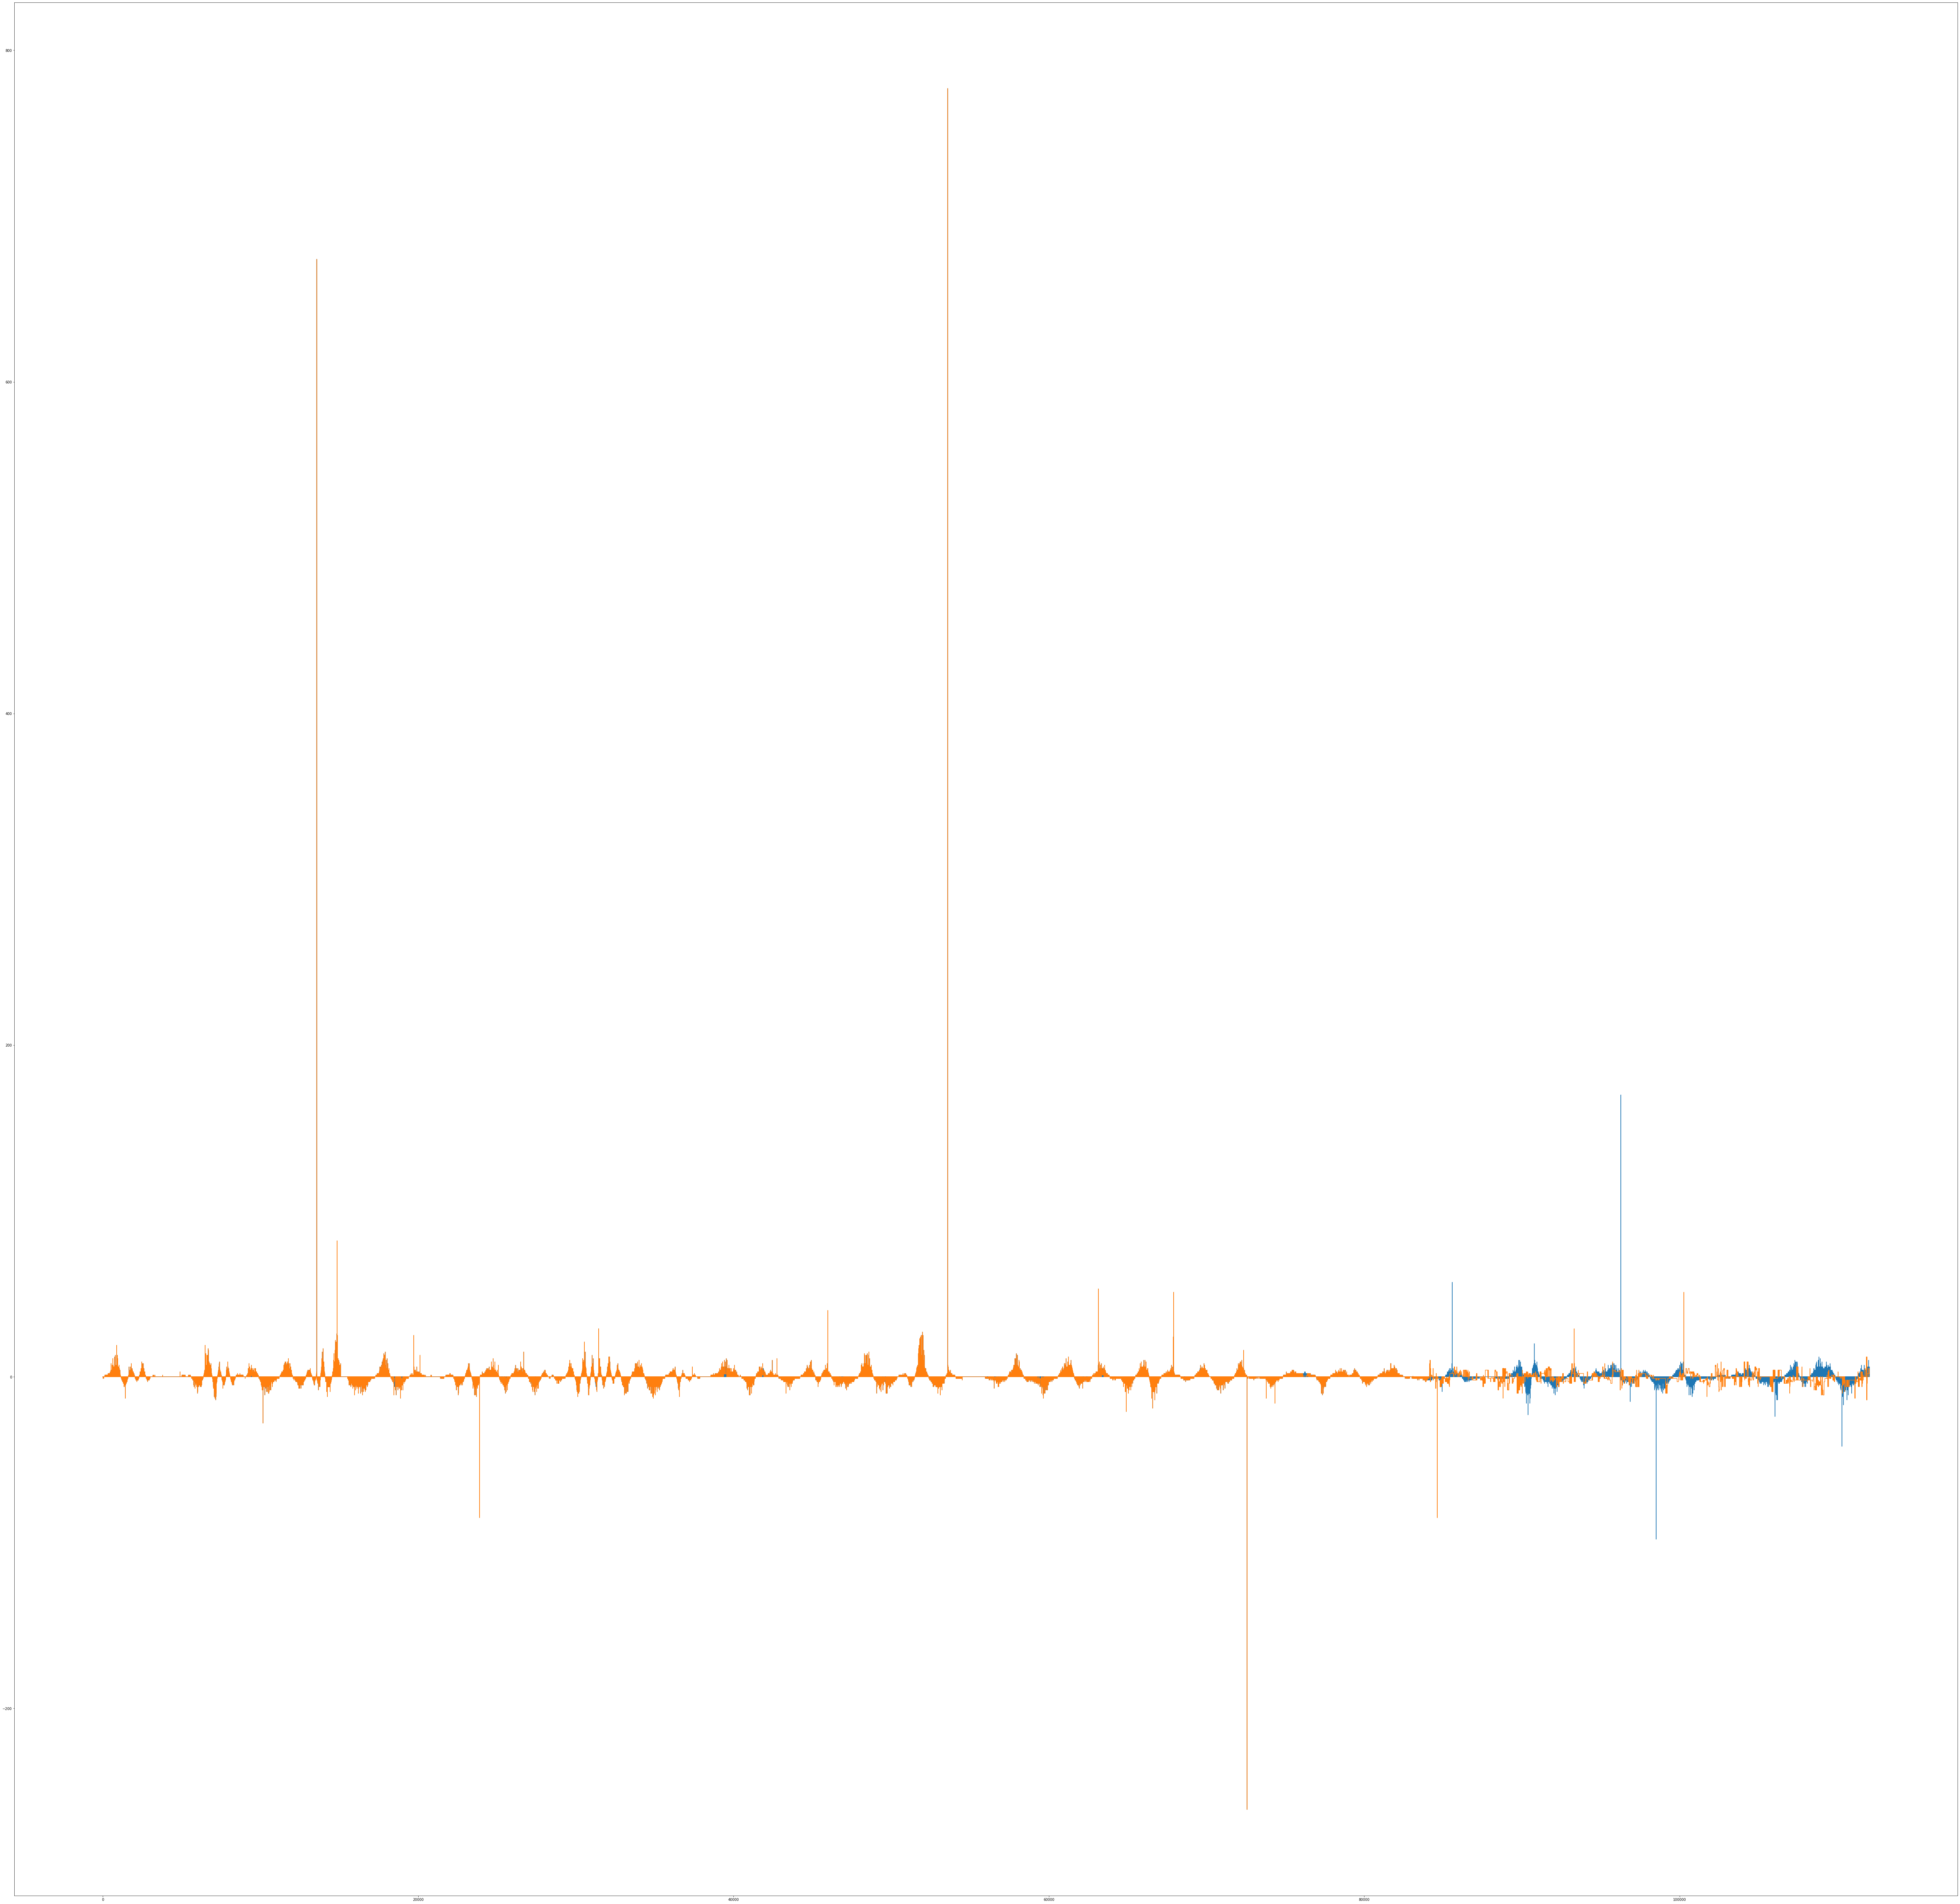

In [16]:
plt.figure(figsize=(100,100))
plt.plot(y);
plt.plot(lr_x.predict(X));


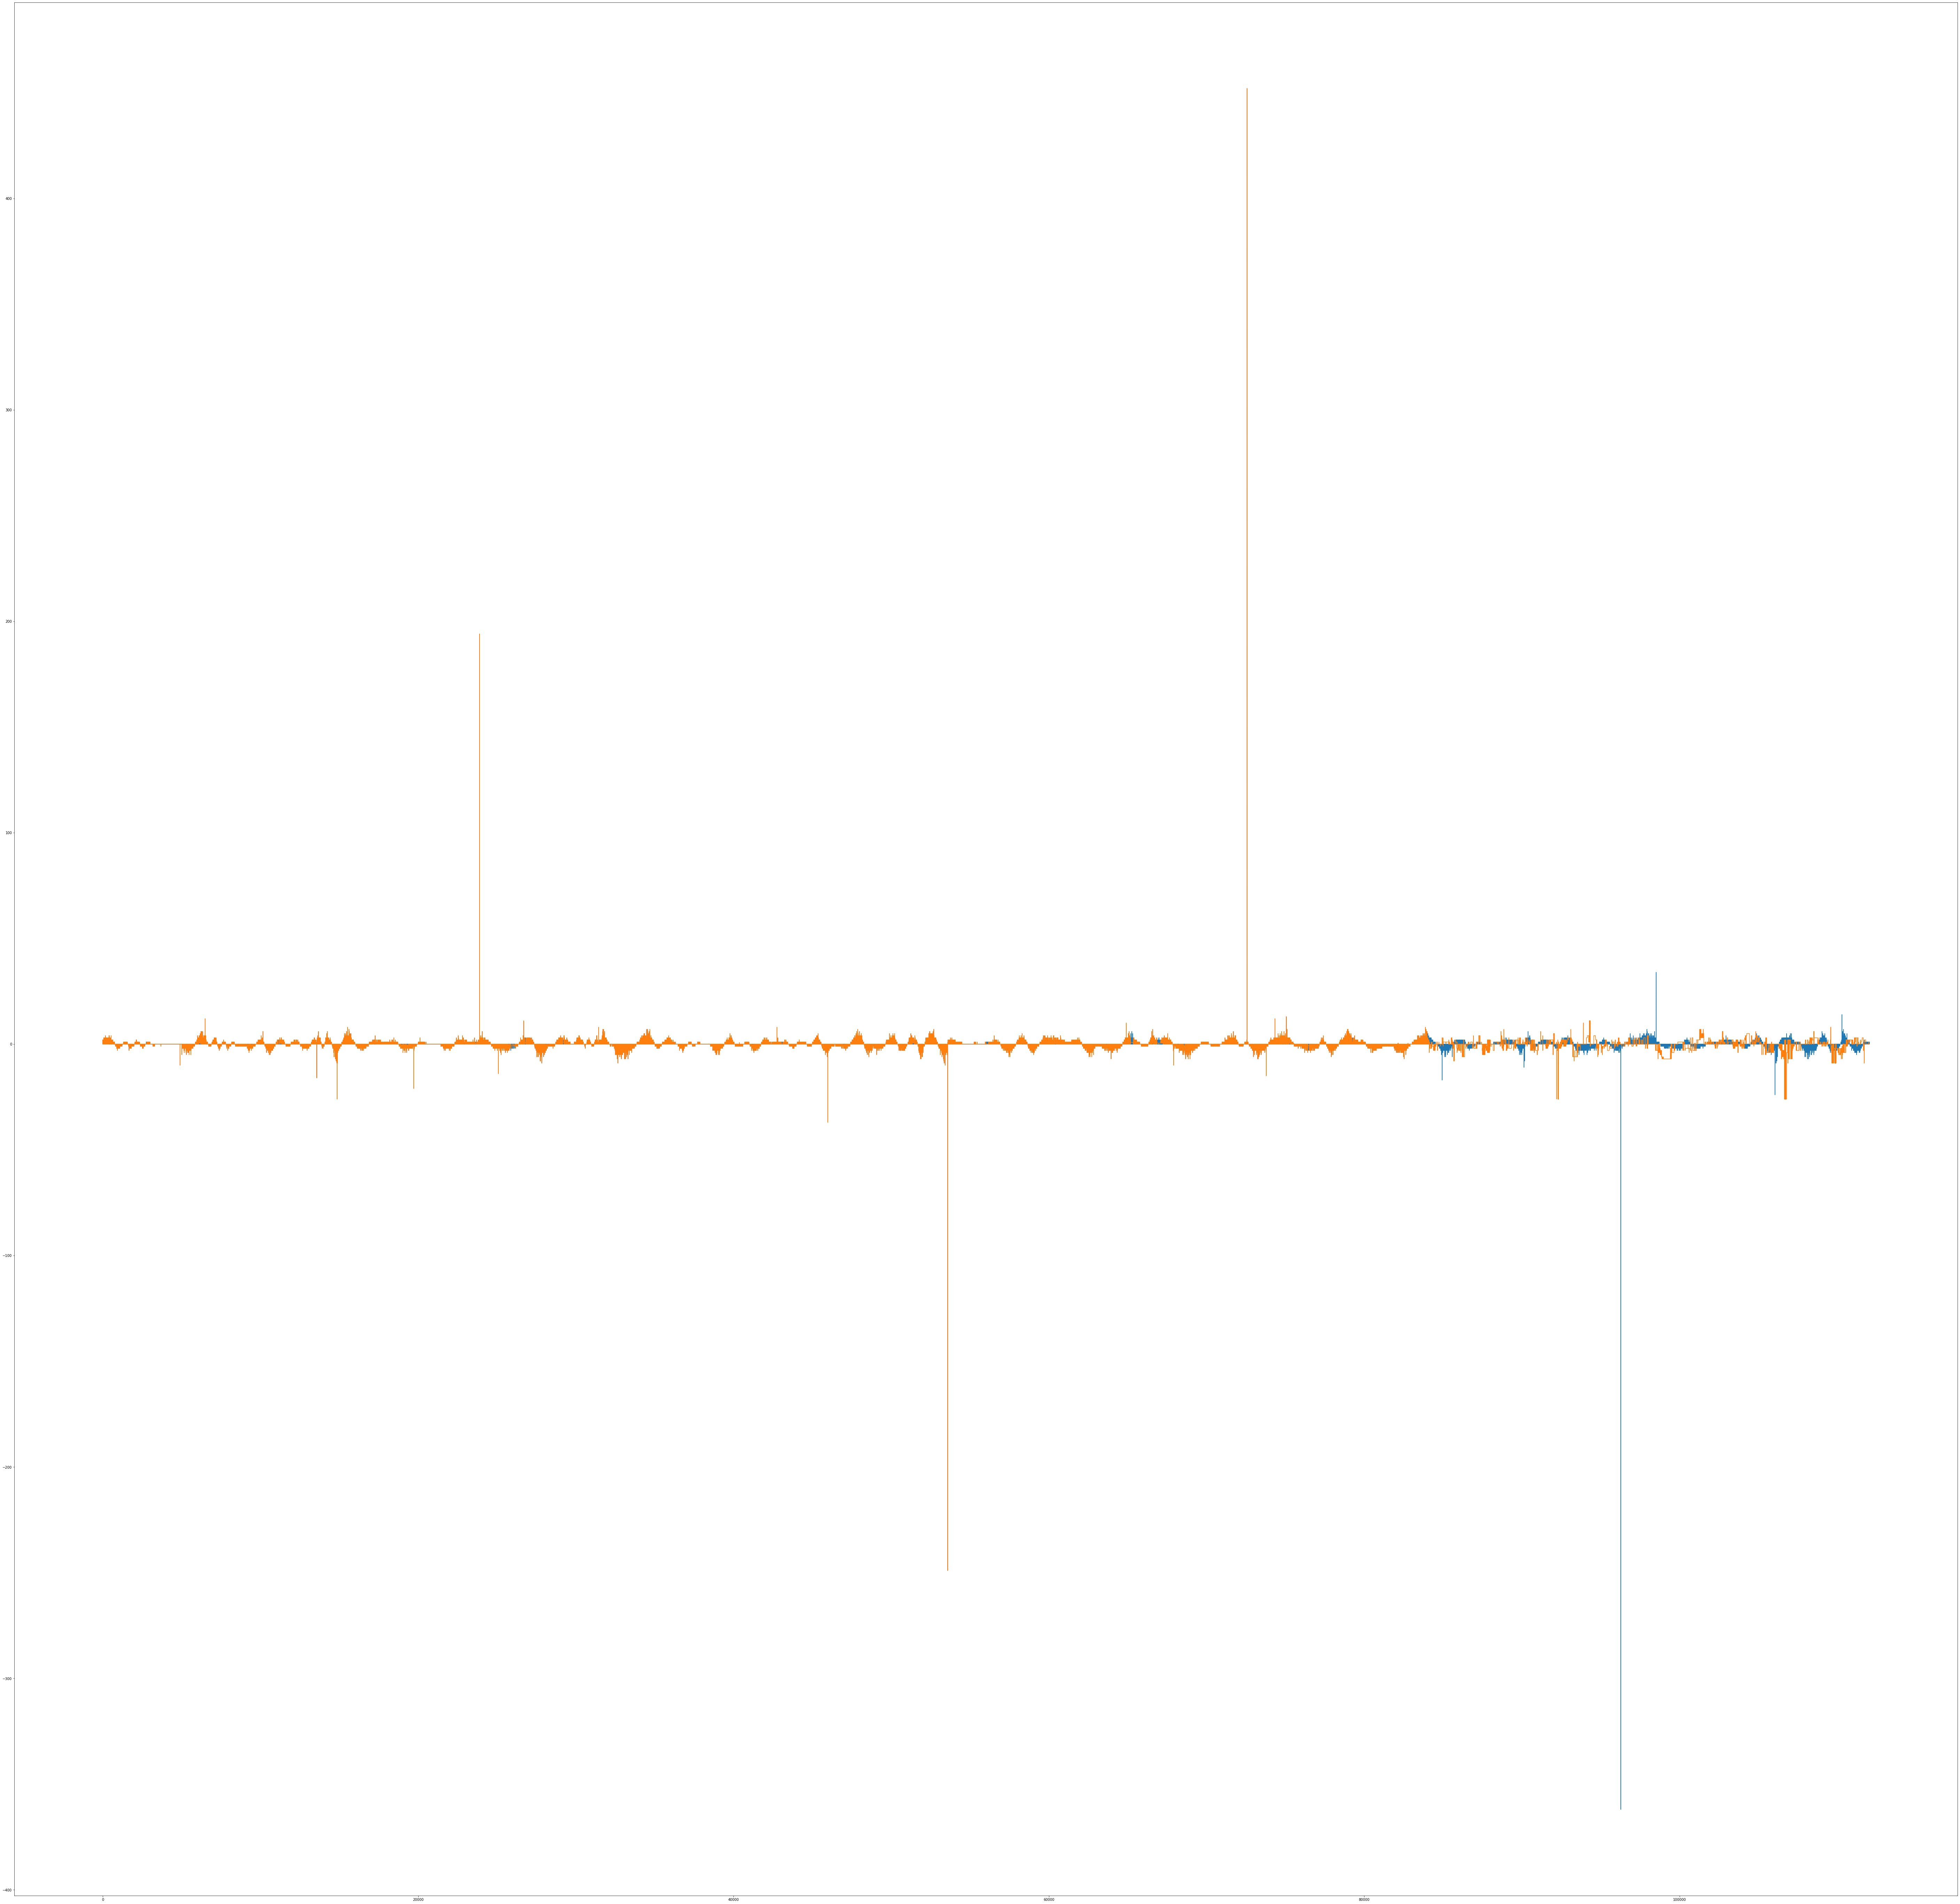

In [14]:
plt.figure(figsize=(100,100))
plt.plot(z);
plt.plot(lr_y.predict(W));


In [15]:
with open('../pickled_models/dt_x.pkl', 'wb') as f:
    pickle.dump(lr_x, f)


with open('../pickled_models/dt_y.pkl', 'wb') as f:
    pickle.dump(lr_y, f)
